In [1]:
## To classify generation one pokemon using NN

In [1]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import numpy as np
from sklearn.utils import shuffle

In [35]:
p = Path('./Datasets/')

dirs  = p.glob("*")

# for d in dirs:
#     print(d)



image_data = []
labels = []
image_paths = []
label_dict = {}

label2pokemon = {}

labelcnt = 0


for folder_dir in dirs:
    label = (str(folder_dir).split('/')[-1])
    label_dict[label] = labelcnt
    
    label2pokemon[labelcnt] = label
    
    cnt = 0
    print(label)
    
    #Iterate over folder dir and pick all images of pokemon
    for image_path in folder_dir.glob("*.jpg"):
        img = image.load_img(image_path,target_size = (40,40))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labelcnt)
        
        cnt += 1
    
    print(cnt)
    labelcnt += 1
        
    


Bulbasaur
174
Squirtle
186
Charmander
200
Pikachu
199


## Visualization

In [4]:
print(len(image_data))
print(len(labels))

759
759


In [36]:
X = np.array(image_data)
Y = np.array(labels)

In [37]:
X.shape

(759, 40, 40, 3)

In [38]:
Y.shape

(759,)

In [8]:
## Draw some pokemons

In [9]:
def drawImg(img,label):
    plt.imshow(img)
    plt.title(label2pokemon[label])
    plt.show()

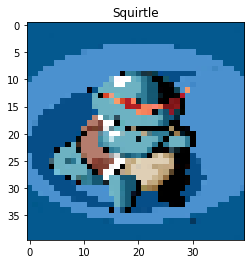

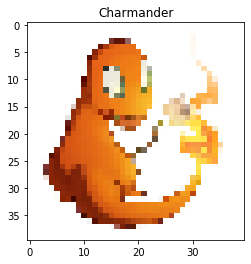

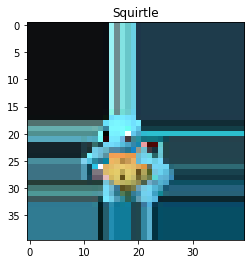

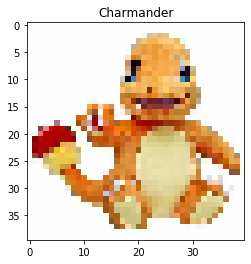

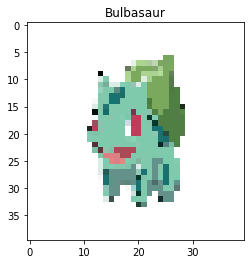

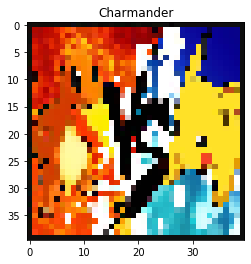

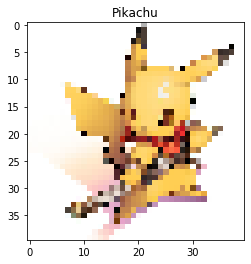

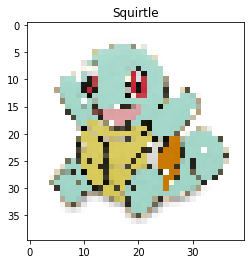

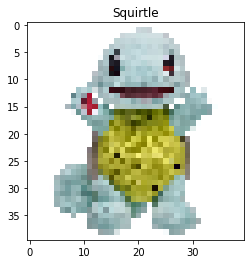

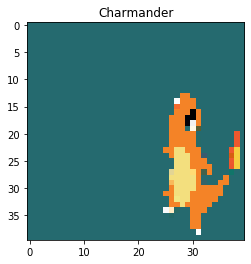

In [10]:
for i in range(10):
    rand_idx = np.random.randint(650)
    drawImg(X[rand_idx]/255,Y[rand_idx])

In [39]:
X,Y = shuffle(X,Y,random_state = 2)
X = X/255

In [40]:
print(Y)

[1 1 3 1 0 1 1 2 2 2 1 0 2 2 2 1 3 3 1 0 2 3 0 2 0 2 3 3 3 2 0 0 1 1 0 0 1
 2 2 1 0 0 3 0 3 3 3 3 0 0 2 0 2 3 2 1 3 2 1 1 3 0 2 1 2 1 2 2 1 0 1 3 3 3
 1 0 0 3 2 3 3 3 0 0 2 1 2 0 1 3 3 2 2 1 2 3 2 2 1 3 1 2 2 1 1 3 0 2 2 2 1
 0 1 2 0 0 2 1 3 1 2 3 2 1 1 0 1 2 1 2 3 0 3 2 1 3 1 3 2 1 2 3 2 1 2 1 0 0
 2 3 3 2 3 2 3 2 3 1 1 1 3 0 1 1 3 1 2 2 1 1 3 3 3 2 2 1 2 2 0 1 1 0 2 2 3
 2 2 0 3 0 0 1 1 2 3 0 0 2 2 2 0 1 0 0 1 1 0 3 2 3 1 3 3 1 3 2 0 2 0 0 3 2
 3 3 1 0 0 2 2 2 1 2 0 3 0 0 1 1 0 2 1 3 0 0 3 3 3 3 3 3 3 3 1 0 0 3 0 3 0
 2 0 1 3 0 3 2 1 0 1 0 1 0 2 2 2 2 3 0 1 2 0 2 2 1 1 0 2 1 1 0 1 0 1 0 1 3
 0 3 3 2 1 1 3 1 3 1 2 0 3 1 3 3 0 1 2 2 3 0 0 0 2 1 3 0 1 1 1 0 0 2 0 3 2
 2 1 2 1 2 3 2 0 1 3 0 3 2 3 2 3 2 2 3 0 2 2 0 0 0 1 2 3 0 2 3 2 2 3 1 0 2
 0 0 1 1 1 3 0 2 3 1 1 2 1 2 2 2 3 3 3 3 3 1 0 2 2 0 3 1 0 2 1 1 2 0 1 3 2
 0 3 1 2 3 2 3 1 0 0 2 0 3 0 3 3 3 1 3 1 2 1 1 1 2 3 0 2 3 0 3 1 0 2 1 1 2
 1 0 0 1 1 0 3 2 2 3 2 2 3 2 0 1 2 3 2 2 0 1 0 0 3 0 1 3 2 0 2 1 0 3 3 1 2
 1 3 2 2 2 1 1 1 2 0 2 0 

In [74]:
## will have memory problems for 100 * 100 * 3 for large dataset
## Limitation of nn to have large image size

In [13]:
##Creating Training and Test Set
split = int(X.shape[0]*0.8)

X_ = np.array(X)
Y_ = np.array(Y)

X = X_[:split,:]
Y = Y_[:split]

XTest = X_[split:,:]
YTest = Y_[split:]

print(X.shape,Y.shape)
print(XTest.shape,YTest.shape)

(607, 40, 40, 3) (607,)
(152, 40, 40, 3) (152,)


In [41]:
YTest

array([1, 2, 0, 3, 3, 2, 1, 0, 3, 2, 3, 3, 0, 0, 3, 1, 2, 3, 0, 2, 3, 2,
       3, 3, 2, 3, 2, 0, 2, 1, 0, 2, 1, 1, 3, 3, 1, 3, 3, 3, 0, 3, 1, 2,
       3, 3, 0, 2, 1, 2, 0, 0, 2, 3, 0, 1, 2, 2, 0, 3, 3, 2, 2, 1, 3, 3,
       3, 2, 0, 3, 0, 0, 1, 2, 3, 0, 0, 3, 0, 3, 1, 0, 0, 3, 2, 2, 2, 0,
       0, 2, 2, 2, 3, 3, 3, 2, 2, 3, 1, 2, 3, 2, 3, 3, 1, 1, 0, 0, 1, 3,
       3, 2, 0, 0, 1, 1, 2, 1, 3, 0, 1, 1, 1, 3, 2, 2, 1, 0, 0, 1, 3, 3,
       0, 2, 3, 1, 0, 3, 3, 3, 2, 3, 1, 2, 0, 2, 1, 2, 3, 2, 2, 0])

## Building a NN using Tf and Keras



In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(40, 40, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(4, activation='softmax') ## CHANGE WHEN USING ACTUAL DATASET
])

In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
model.fit(X,Y,epochs=10)

Train on 759 samples
Epoch 1/10
759/759 [==============================] - 0s 398us/sample - loss: 0.6832 - accuracy: 0.7457
Epoch 2/10
759/759 [==============================] - 0s 130us/sample - loss: 0.5699 - accuracy: 0.7931
Epoch 3/10
759/759 [==============================] - 0s 128us/sample - loss: 0.6399 - accuracy: 0.7418
Epoch 4/10
759/759 [==============================] - 0s 132us/sample - loss: 0.5645 - accuracy: 0.7721
Epoch 5/10
759/759 [==============================] - 0s 142us/sample - loss: 0.4975 - accuracy: 0.8274
Epoch 6/10
759/759 [==============================] - 0s 146us/sample - loss: 0.5064 - accuracy: 0.8103
Epoch 7/10
759/759 [==============================] - 0s 161us/sample - loss: 0.4430 - accuracy: 0.8538
Epoch 8/10
759/759 [==============================] - 0s 135us/sample - loss: 0.4127 - accuracy: 0.8788
Epoch 9/10
759/759 [==============================] - 0s 133us/sample - loss: 0.3768 - accuracy: 0.8880
Epoch 10/10
759/759 [======================

In [44]:
test_loss, test_acc = model.evaluate(XTest,YTest, verbose=2)

print('\nTest accuracy:', test_acc)

152/1 - 0s - loss: 0.4546 - accuracy: 0.8553

Test accuracy: 0.8552632


In [20]:
## Good train but bad test (OVERFITTING)

In [45]:
predictions = model.predict(XTest)

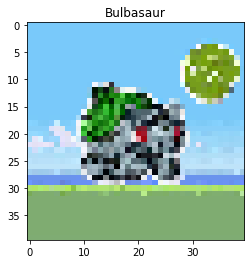

Predicted Label: Squirtle


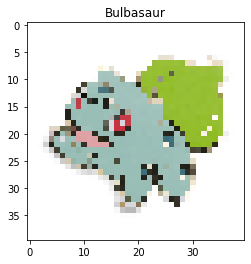

Predicted Label: Bulbasaur


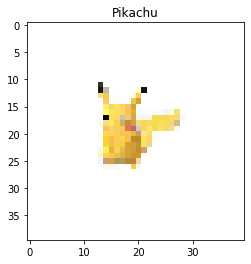

Predicted Label: Squirtle


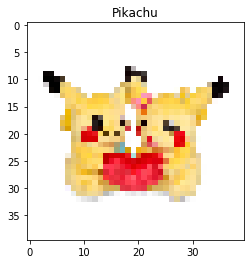

Predicted Label: Pikachu


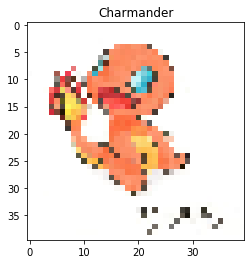

Predicted Label: Charmander


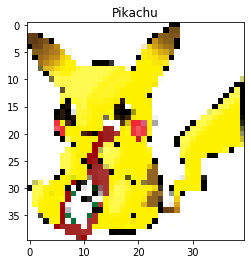

Predicted Label: Pikachu


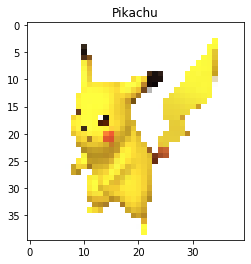

Predicted Label: Pikachu


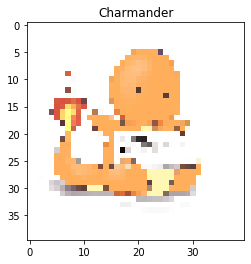

Predicted Label: Charmander


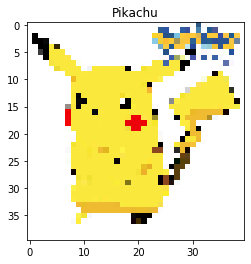

Predicted Label: Pikachu


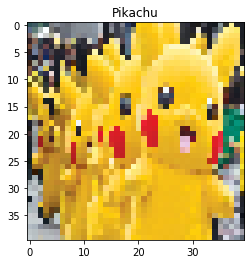

Predicted Label: Pikachu


In [46]:
for i in range(10):
    rand_idx = np.random.randint(122)
    drawImg(XTest[rand_idx],YTest[rand_idx])
    print("Predicted Label:",label2pokemon[np.argmax(predictions[rand_idx])])

In [23]:
## CONFUSION MATRIX REPORT

In [52]:
YTestPredict = []
for i in range(predictions.shape[0]):
    YTestPredict.append(np.argmax(predictions[i]))

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


ModuleNotFoundError: No module named 'mlxtend'

In [55]:
print(classification_report(YTestPredict,YTest))


              precision    recall  f1-score   support

           0       0.82      1.00      0.90        28
           1       1.00      0.65      0.79        43
           2       0.71      0.94      0.81        31
           3       0.92      0.90      0.91        50

    accuracy                           0.86       152
   macro avg       0.86      0.87      0.85       152
weighted avg       0.88      0.86      0.85       152



In [59]:
print(confusion_matrix(YTestPredict,YTest))

[[28  0  0  0]
 [ 5 28  7  3]
 [ 1  0 29  1]
 [ 0  0  5 45]]
